In [1]:
import sys
import os

cwd = os.getcwd()
pwd = os.path.dirname(cwd)
sys.path.append(cwd)
sys.path.append(pwd)

In [2]:
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")

from core.emb.char_embedding import CharEmbedding

np.set_printoptions(
    precision=5,
    threshold=5
)
ce = CharEmbedding()

characters = list(string.printable)
embeddings = ce.embed_input(characters)
characters[-6] = " "
characters[-5] = "\\n"
characters[-4] = "\\t"
characters[-3] = "\\r"
characters[-2] = "\\v"
characters[-1] = "\\f"
for idx, character in enumerate(characters):
    print(character, embeddings[idx])

/data/qtran/anaconda3/envs/textkit/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at bert-large-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exa

0 [-0.0089  -0.29244 -0.11111 ... -0.19998 -0.24979 -0.13677]
1 [-0.12683 -0.35149  0.15281 ... -0.24885 -0.38195 -0.05897]
2 [-0.38673 -0.57783  0.04163 ... -0.17759 -0.05834 -0.02157]
3 [-0.37558 -0.42487  0.14551 ... -0.34655 -0.20865 -0.02804]
4 [-0.38411 -0.59139  0.1912  ... -0.28363 -0.33586  0.06489]
5 [-0.34705 -0.46374  0.22425 ... -0.48916 -0.31353  0.04094]
6 [-0.46146 -0.53709  0.11905 ... -0.57137 -0.36377 -0.13948]
7 [-0.42331 -0.37839  0.37446 ... -0.46227 -0.29055  0.0756 ]
8 [-0.46041 -0.50035  0.45026 ... -0.32907 -0.20871 -0.02769]
9 [-0.45973 -0.46431  0.33501 ... -0.46803  0.04425  0.0906 ]
a [ 0.06934 -0.71711  0.36821 ...  0.2557   0.37772  0.15829]
b [-0.37766 -0.57014  0.4322  ... -0.02725 -0.18119  0.0864 ]
c [ 0.01312 -0.38436  0.24671 ...  0.48916 -0.21185  0.28957]
d [-0.36905 -0.24992  0.49686 ...  0.29001  0.09609 -0.04471]
e [-0.20921 -0.37015  0.25017 ... -0.11485  0.10415  0.4101 ]
f [-0.18038 -0.57123  0.46613 ... -0.10305  0.07275  0.16509]
g [-0.43

/tmp/ipykernel_2323709/1878121107.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(characters)
/tmp/ipykernel_2323709/1878121107.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(characters)


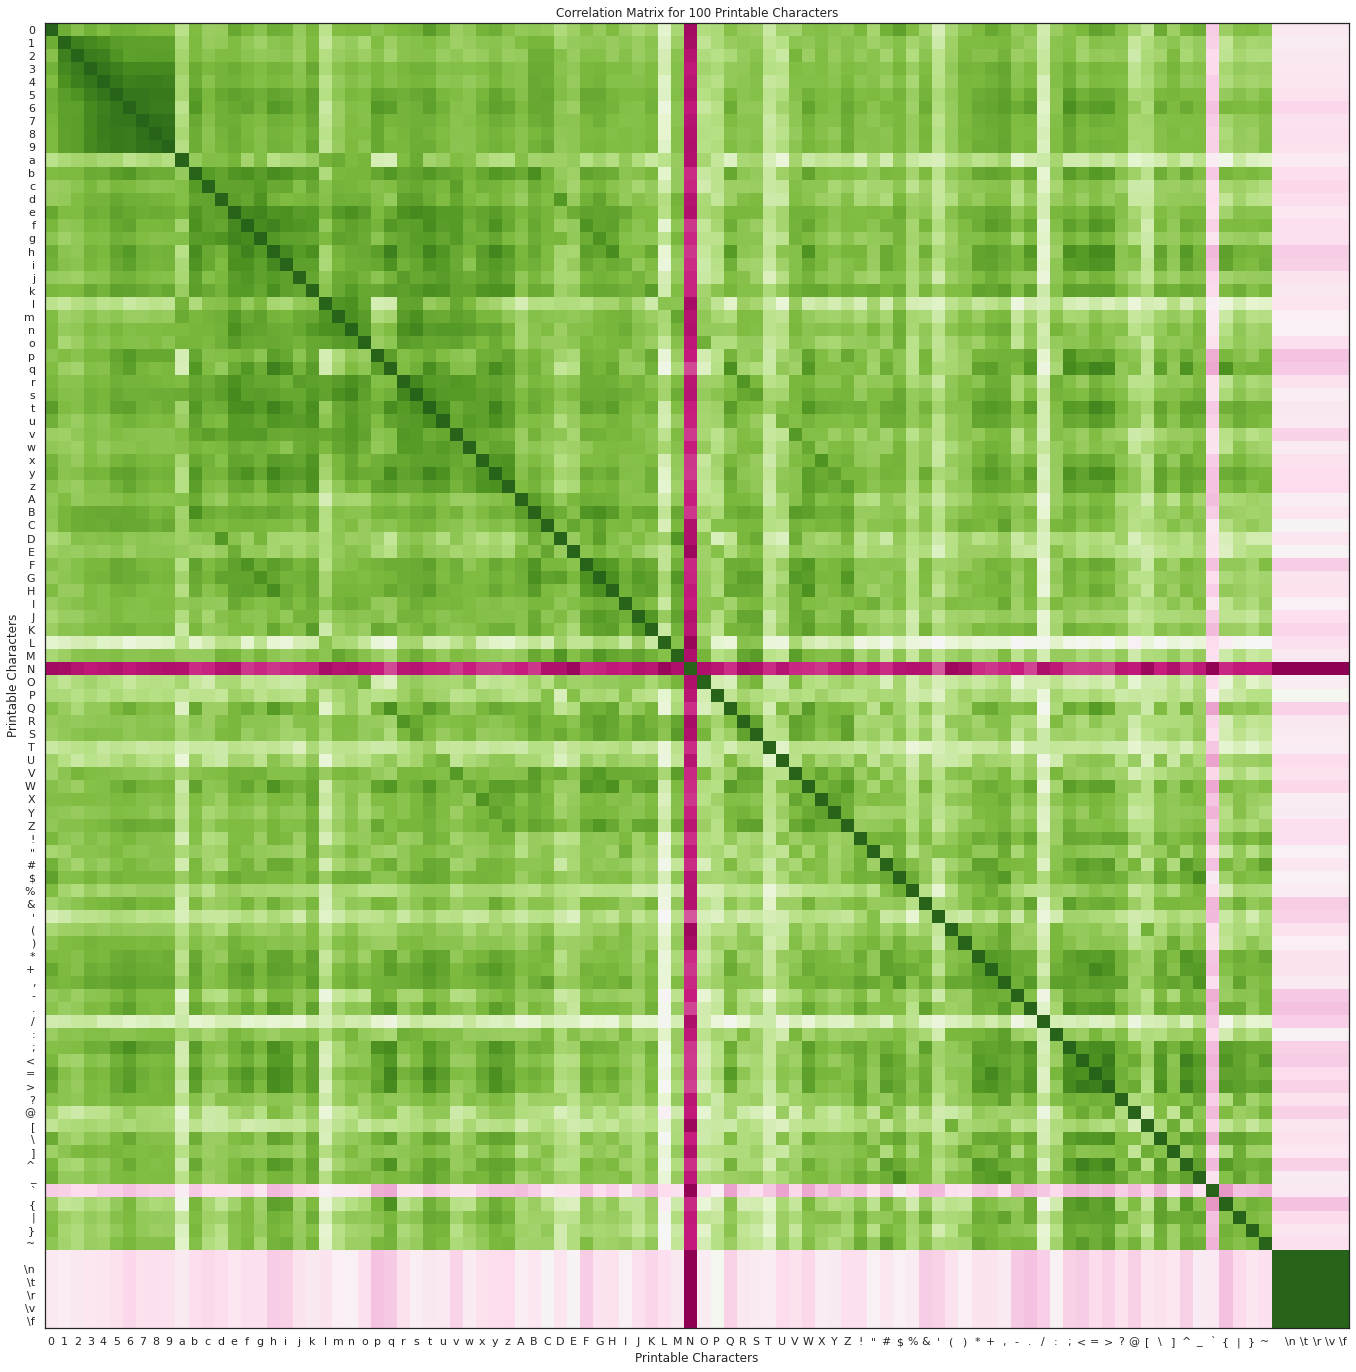

In [3]:
# embeddings -= embeddings.min()
# embeddings /= embeddings.max()
embeddings -= embeddings.mean()
embeddings /= embeddings.std()

# Compute the correlation matrix
corr_matrix = np.corrcoef(embeddings)

# Create the heatmap
fig, ax = plt.subplots(figsize=(24, 24))
heatmap = ax.imshow(corr_matrix, cmap='PiYG')

# Set the tick labels and positions
ax.set_xticklabels(characters)
ax.set_yticklabels(characters)
ax.set_xticks(np.arange(len(embeddings)))
ax.set_yticks(np.arange(len(embeddings)))

# Set the title and axis labels
ax.set_title('Correlation Matrix for 100 Printable Characters')
ax.set_xlabel('Printable Characters')
ax.set_ylabel('Printable Characters')

plt.show()

NameError: name 'tokens' is not defined

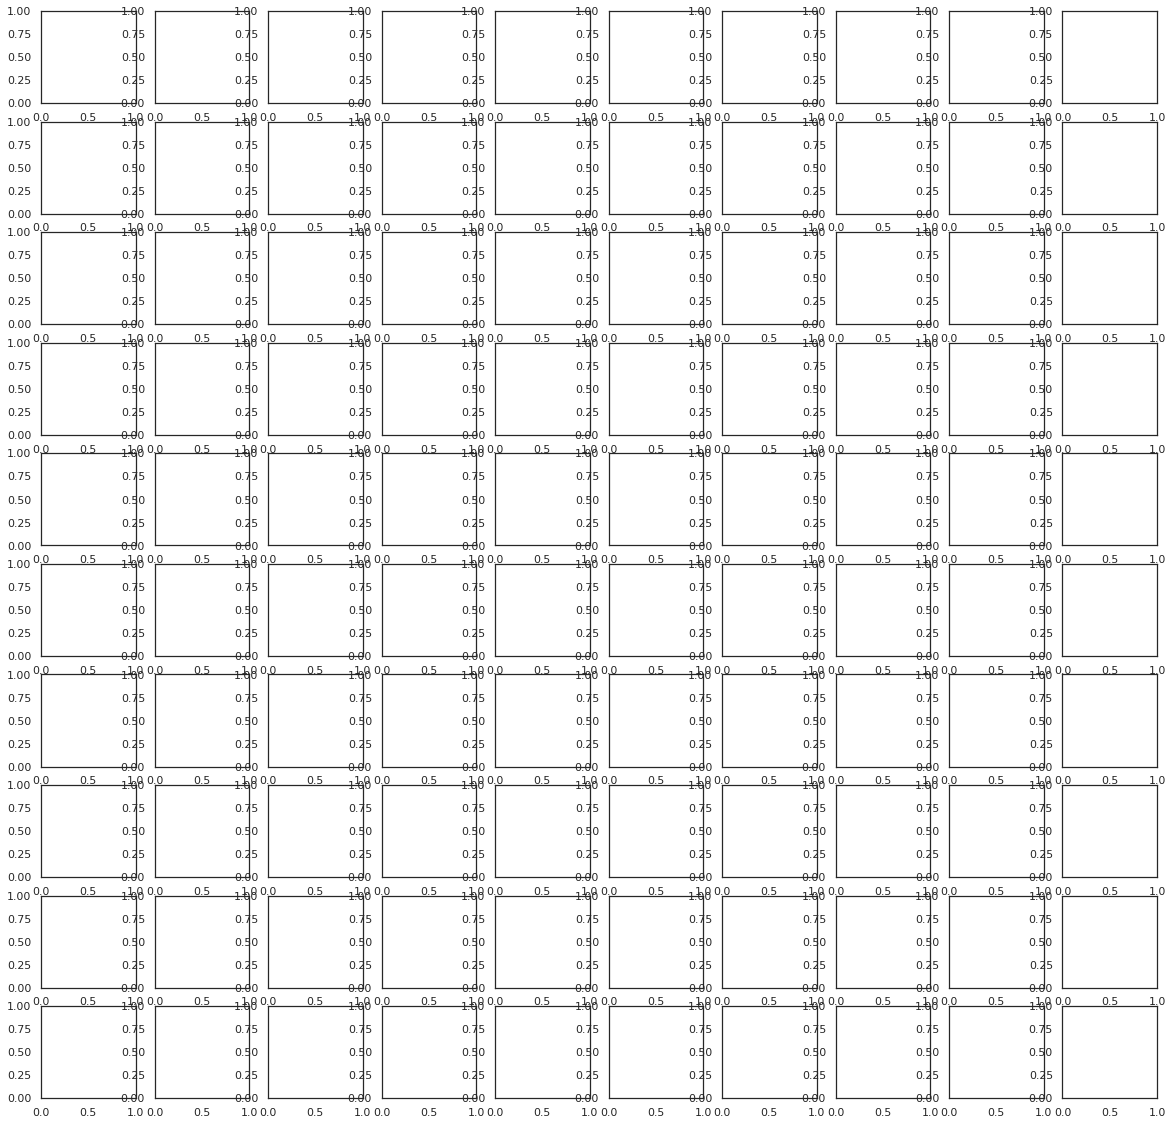

In [4]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))
for i, character in enumerate(characters):
    ax[i//10, i % 10].imshow(embeddings[i].clip(0, 1).reshape(32, 32),
                              cmap="PiYG", interpolation='nearest')
    ax[i//10, i % 10].axis('off')
    ax[i//10, i % 10].axis('tight')
    ax[i//10, i % 10].set_title(token)
plt.show()